<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png" width="300"></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

В этом ноутбке будет рассказано об основах машинного обучения.

# 1. Полезные ссылки

1. [Наши доп материалы на Stepik](https://stepik.org/lesson/394280/step/1?unit=383263)
1. [Больше о разных направлениях машинного обучения](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5)
2. Лекции Евгения Соколова https://github.com/esokolov/ml-course-msu/tree/master/ML15/lecture-notes

# 2. Практическое занятие

Что нужно вынести для себя из занятия:
* Синтаксис работы с моделями и трансформерами в sklearn.
* Какие бывают шаги предобработки данных.
* Когда вы решаете ML задачу обязательно надо посмотреть на данные.


### sklearn
В sklearn есть два типа объектов:

1. Estimator -- модель для предсказаний. Есть метод .fit(X, y) и .predict(X)
2. Transformer -- обработчик данных (например нормирование признаков). Есть метод .fit(X) и .transform(X)

## Данные

Данные - информация о приложениях из AppStore. Поставим регрессионную задачу - предсказать рейтинг приложения.

Скачать данные: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

## Анализ данных

Начнем с самой важной части - посмотрим на данные.

А теперь посмотрим на корреляции между признаками

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Загрузим данные и посмотрим на небольшую часть
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Выделим признаки из датасета и поделим их на числовые и категориальные.

In [3]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    # Эта признак - не числовая, а порядковая, но мы все равно возьмем ее как числовую для удобства
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [4]:
data = data[cols]
# Возраст записан не в виде числа, исправим это, вырезав последний символ и скастовав к числу
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [5]:
# Посмотрим на пропущенные значения
data.isna().sum()

size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
cont_rating         0
currency            0
prime_genre         0
user_rating         0
dtype: int64

In [13]:
# Посмотрим на распределение категориальных признаков
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

In [12]:
# Как мы видим, в колонке currency только одно значение, можно колонку убрать
data = data.drop(columns=['prime_genre'])
cat_cols.remove('prime_genre')

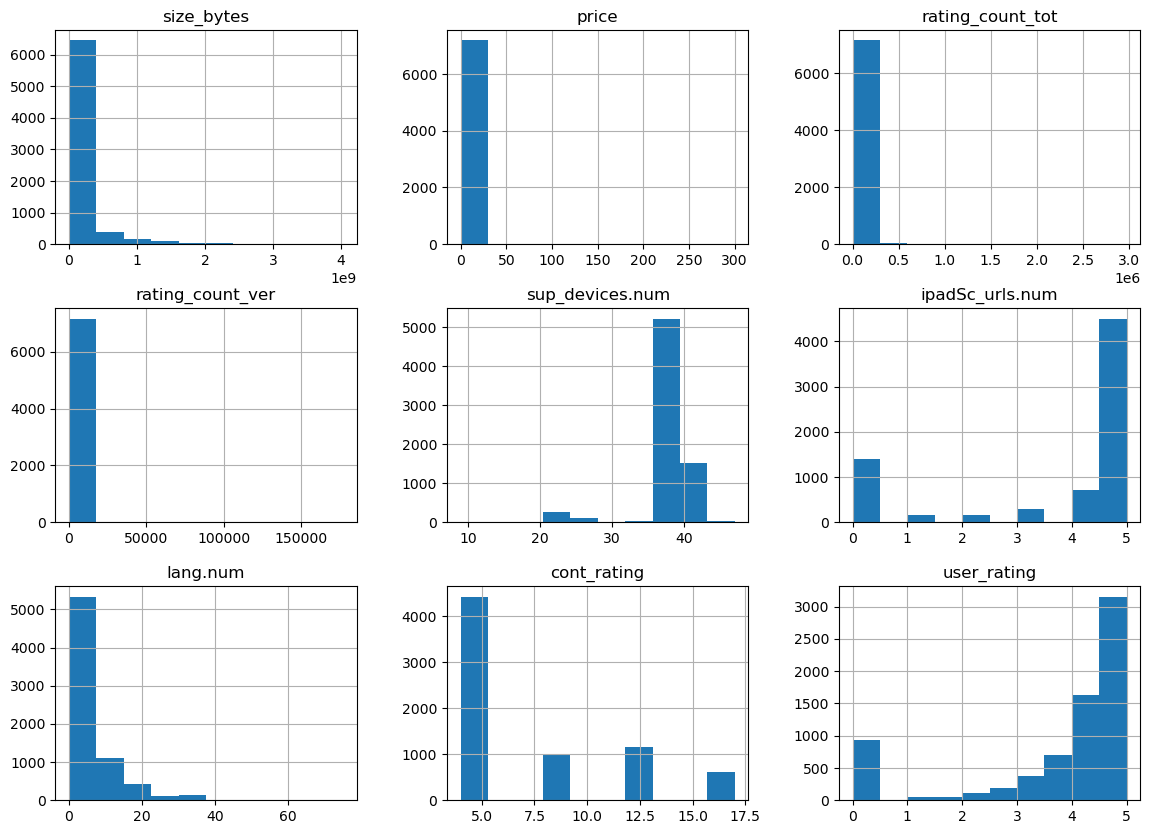

In [14]:
# Посмотрим на распредление величин
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

In [15]:
data.corr().style.background_gradient(cmap='coolwarm')

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.000000,0.182392,0.004486,0.006337,-0.118347,0.152697,0.004614,0.140541,0.066256
price,0.182392,1.000000,-0.039044,-0.018012,-0.115361,0.066100,-0.006713,-0.029666,0.046601
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.008832,0.015734,0.137675,0.009139,0.083310
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.037951,0.024333,0.013287,0.001435,0.068754
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,1.000000,-0.037728,-0.041681,0.020085,-0.042451
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,-0.037728,1.000000,0.088378,-0.107726,0.265671
lang.num,0.004614,-0.006713,0.137675,0.013287,-0.041681,0.088378,1.000000,-0.069508,0.170976
cont_rating,0.140541,-0.029666,0.009139,0.001435,0.020085,-0.107726,-0.069508,1.000000,-0.097999
user_rating,0.066256,0.046601,0.083310,0.068754,-0.042451,0.265671,0.170976,-0.097999,1.000000


И двойные графики

D:\Other\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


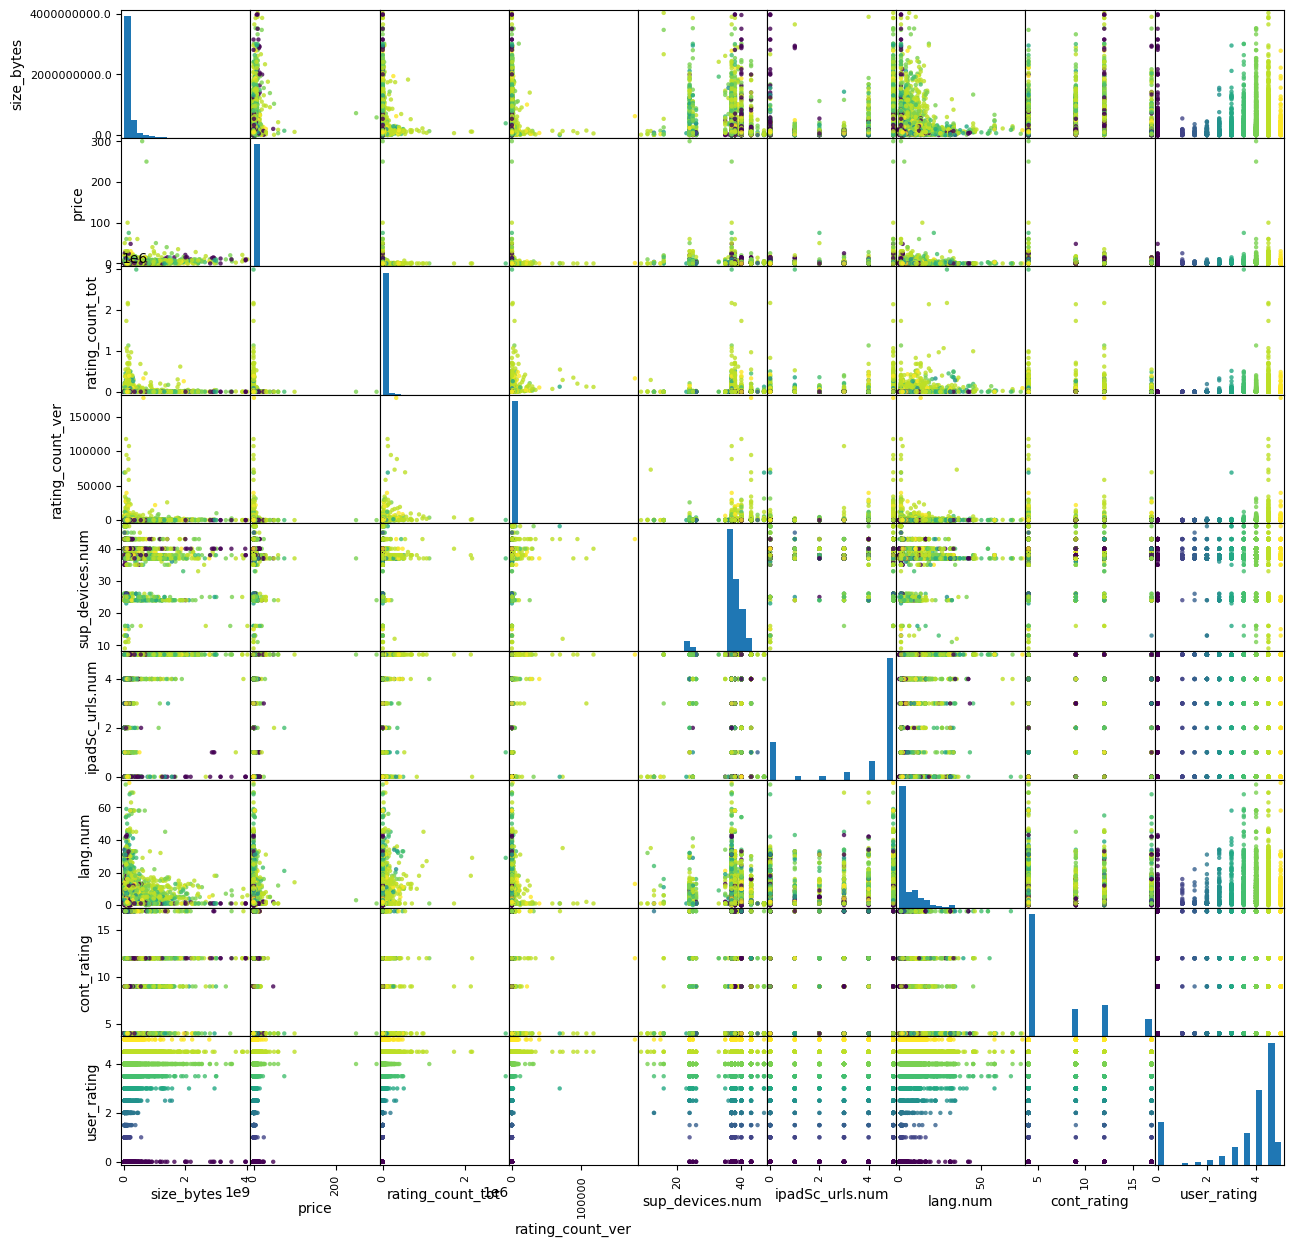

In [16]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

**Упражнение**: Мы только что посмотрели на данные, какой из посмотренных графиков говорит, что мы вряд ли сможем сделать хорошую модель?
> Ответ:

В данном случае признаков мало, поэтому мы легко смогли посмотреть на них. Обычно признаков намного больше и построить такие графики для пар признаков не получится. Тогда в первую очередь можно посмотреть на корреляцию признаков с таргетом.

## Подготовка данных

### Очистка

Данные достаточно чистые, в них вряд ли есть какие-то ошибки и не получается с первого взгляда найти выбросы (outliers). Поэтому и очищать особо нечего. Но в реальной жизни, ваши данные скорее всего будут полны мусора.

Чаще всего нам пришлось бы убирать выбросы, исправлять очевидные ошибки итд.


### Создание признаков

Чем сложнее зависимость между признаков и таргетом, тем более сложная модель потребуется, чтобы эту зависимость использовать. Почему бы просто не выбрать семейство самых гибких моделей? Проблема в том, что без большого количества данных для обучения будет происходить overfit. Это значит, что модель выучит зависимости, которые случайно появились в обучающих из-за ограниченного размера выборки. Такая модель будет хорошо работать на обучающей выборке, но будет плохо справляться с реальной задачей.

Используя человеческие знания об устройстве мира, мы можем упростить такую зависимость, создав новые признаки. На самом деле, можно даже не использовать человеческие знания, а просто применить какой-нибудь алгоритм. Например, если у нас есть признаки $x_1, x_2, ..., x_n$, то мы можем добавить новые признаки вида
$$x_{newij} = x_i x_j, i \ne j$$
и понадеяться, что это улучшит предсказания

In [17]:
# Добавим категориальную признак, которая говорит, бесплатное приложение или нет
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,4.5,True


### Работа с категориальными признаками


Большинство алгоритмов не принимает категориальные признаки в чистом виде и нужно из как-то закодировать.

Очень небольшое число алгоритмов МО умеет работать с категориальными признаками в чистом виде. Например, это делает библиотека для градиентного бустинга от Яндекса catboost. Внтури она применяет разные эвристики для кодирования признаков в числа.

One-hot-encoding
Самый простой способ закодировать категориальные признаки - one hot encoding. Представьте, что у нас есть категориальная признак prime_genre с возможными значениями
> ['Games', 'Entertainment', 'Education', 'Photo & Video']

мы можем создать 4 новые бинарные признаки для каждого из столбцов

> 'Entertaiment' -> [0, 1, 0, 0]

В pandas очень удобно использовать get_dummies для one-hot-encoding

In [18]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [19]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True


In [22]:
# Задание: Теперь добавьте в датафрейм колонки для всех категориальных признаков и обновите список категориальных признаков
data = pd.get_dummies(data, columns=cat_cols)

In [23]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

### Масштабирование признаков

Как мы говорили в лекции часто необходимо привести все признаки к одному масштабу. Для этого в sklearn есть специальный Transformer -- StandardScaler и MinMaxScaler.

StandardScaler во время .fit() для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


MinMaxScaler во время .fit() для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

In [24]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
# Выход pca - numpy матрица, положим ее в новую переменную со всеми признаками
X = pca.transform(data[num_cols + cat_cols])

# Или есть более простой способ
X = pca.fit_transform(data[num_cols + cat_cols])

## Разделение на train/test

После того, как мы обучили нашу модель нам нужно как-то понять, насколько она хорошо работает. Выше мы уже говорили про переобучение на данные, с которыми сеть обучалась. Из-за такого переобучения мы не сможем посчитать адекватно узнать точность предсказаний, если проверим точность на тех же данных, на которых обучались. Чтобы с этим бороться обучающую выборку обычно делят на две части train и test. На первой мы будем обучать модель, а на второй проверять, насколько хорошо модель работает. Размер тестовой выборки в 30-40% - неплохой выбор.

Иногда данных слишком мало, чтобы жертвовать ими на тестовую часть. Тогда применяется метод, который называет cross validation. Мы посмотрим на то, как он работает в секции про оценку модели.

**На самом деле, мы сделали не совсем правильно, потому что разделение на train/test нужно делать до добавления новых признаков/их кодирования итд. Иначе возможны лики из test части в train часть.** Например, при нормализации и PCA мы работаем со всем массивом данных, а значит информация из test попадет и в train. Но для упрощения кода и понимания того, что происходит мы не поделили выборку заранее. Если бы мы все-таки разделили выборку заранее, то нужно использовать fit на train части, а transform уже на обеих.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Задание: Загуглите как работает эта функция и поделите выборку на две части
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

Хорошо, теперь можно обучить модели

## Обучение

Самый хороший способ - попробовать максимум разных алгоритмов, посмотреть, какой из них лучше справляется и уже по метрикам выбрать лучший (возможно, объединить предсказания с помощью стэкинга или блендинга, о которых будет на следующем занятии).

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

Поговорим про метрики. Метрика это, так же как и функция потерь, какая-то функция, показывающая насколько хорошо работает наша модель. Например, любой лосс можно назвать метрикой. Но не любую метрику можно назвать лоссом: лосс это именно то число, которое мы уменьшаем в процессе обучения модели + для лосса всегда верно, что чем он меньше, тем лучше. Метрики нужны как раз для того, чтобы оценивать работу алгоритма с помощью числа, которое он не учился напрямую минимизировать.

Для классификации наиболее простой метрикой будет являться точность или accuracy (доля совпавших предсказаний и настоящих классов). Она никогда не используется внутри лоссов, потому что нет эффективного алгоритма, который бы позволил ее обучать модели с такой функцией потерь.

В данном случае у нас задача регрессии, поэтому мы используем две метрики MSE и R_squared.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y^i - y_{pred}^i)^2}{\sum_{i=1}^{n} (y^i - y_{mean})^2}$$

R_aquared это доля объясненной вариации. R_squared = 1, когда у нас есть идеальный предсказатель. R_squared = 0 достигает модель, которая просто выдает в качестве ответа среднее Значение целевой переменной. А значения меньше 0 говорят о том, что модель хуже константного предсказателя.

In [28]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [51]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
lr = LinearRegression(fit_intercept=True, n_jobs = 20)
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -6.98149330399275
MSE: 2.064258041015874


In [45]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.810115704110709
MSE: 1.8800015432098764


**Задание:** поиграйтесь с гиперпараметрами и улучшите предсказания моделей.

## Cross Validation

До этого мы разбирали случай, когда выборка заранее делится на train/test, но часто данных итак не хватает и отдавать их часть на test слишком расточительно. В такой ситуации на помощью приходит кросс валидация:
1. Выберем $k$ - количество частей, на которые разобьется наш датасет
2. for $ i = 1..k$
    * Обучим модель на всех частях датасета, кроме i-ой.
    * Посчитаем метрики или предсказания для i-ой части
3. Саггрегируем все все предсказания или усредним метрики

Таким образом мы сможем получить более объективные предсказания нашей модели, использовав весь датасет как train и как test, при этом не создав утечек данных.

В sklearn существуют уже готовые классы моделей, которые за нас проводят все вышеописанные действия. Но у них есть один минус - выше мы уже писали, что лики могут произойти еще на этапе обработки данных. Избежать этого при ручной разбивке датасета легко, но в случае кросс валидации придется либо сдлеать специальный объект Pipeline, в котором будет скрыта вся обработка данных, и sklearn просто вызовет его $k$ раз, либо руками выбирать индексы объектов с помощью класса KFold и самостоятельно обрабатывать данные. Мы не будем делать ни то, ни другое, но покажем, как это может быть реализовано.

Получим из кроссвалидации метрики

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [54]:
cross_validate(LinearRegression(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00199795, 0.00199914, 0.00200009, 0.00200248, 0.00300026]),
 'score_time': array([0.0010004 , 0.00100183, 0.00099826, 0.00199866, 0.00099945]),
 'test_r2_score': array([-0.83400906,  0.04424761,  0.10691489,  0.08599884,  0.06812442]),
 'test_mean_squared_error': array([1.66890225, 1.52258036, 1.95976628, 2.89327804, 2.94130806])}

In [55]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score, ),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.01500845, 0.01499557, 0.01500058, 0.0139997 , 0.01400137]),
 'score_time': array([0.03900862, 0.05998349, 0.0389998 , 0.03699946, 0.03899932]),
 'test_r2_score': array([-0.64358925, -0.0233866 , -0.00278054,  0.18656753,  0.10771135]),
 'test_mean_squared_error': array([1.495625  , 1.63032639, 2.2004795 , 2.57492703, 2.81635858])}

## GridSearchCV
А еще с помощью кросс валидации можно искать гиперпараметры.

In [56]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(),
                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                               cv=5,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10)


In [58]:
gbr_grid_search.fit(X_train, y_train)

InvalidParameterError: The 'error_score' parameter of GridSearchCV must be a str among {'raise'} or an instance of 'float'. Got make_scorer(mean_squared_error) instead.

In [59]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Vanilla KFold

**Задание**: Разберитесь как работает KFold по документации sklearn.

In [64]:
from sklearn.model_selection import KFold

In [65]:
kf = KFold(n_splits=5)

In [66]:
model = KNeighborsRegressor()

In [67]:
metrics = []
for train_ind, test_ind in kf.split(X_train):
    model.fit(X_train[train_ind], y_train.values[train_ind])
    pred = model.predict(X_train[test_ind])
    metrics.append(mean_squared_error(y_train.values[test_ind], pred))

In [68]:
metrics

[2.2144270833333337,
 1.9398263888888891,
 1.9948827106863598,
 1.8541181581233712,
 1.9878279756733277]